In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("poly.csv")
df 

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [50]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [51]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [52]:
df.shape

(6, 3)

In [53]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [54]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [55]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [56]:
df.drop(["sno"],inplace=True,axis=1)

In [57]:
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [58]:
x=df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [59]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'Temperature - Pressure Graph')

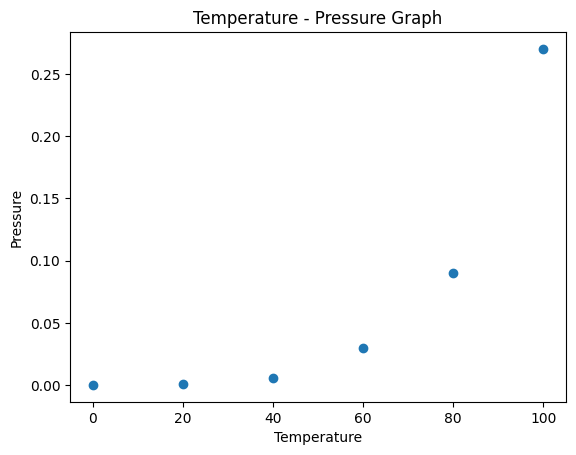

In [67]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Temperature - Pressure Graph")

In [61]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)


Text(0.5, 1.0, 'Temperature - Pressure Graph')

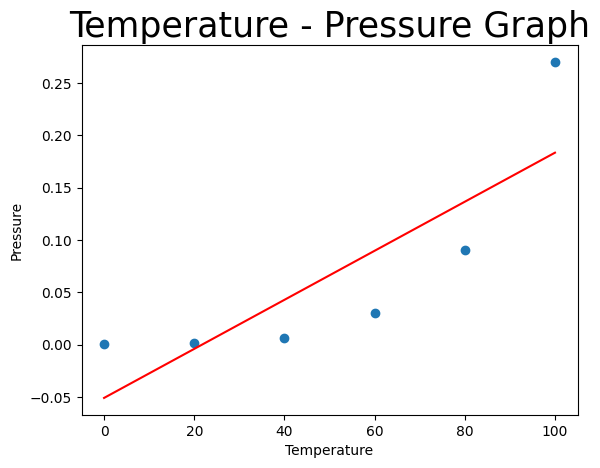

In [68]:
# import seaborn as sb
# sb.regplot(x=x,y=y_pred)

plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Temperature - Pressure Graph",size=25)

In [63]:
print("Slope -",model.coef_)

Slope - [0.002342]


In [64]:
print("Constant : ",model.intercept_)

Constant :  -0.05086666666666667


In [65]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(y,y_pred)
score=r2_score(y,y_pred)
mape

44.775078189300416

In [66]:
score

0.690349972603981

In [69]:
# to increase features to reduce error
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)   # x ===> 3 features
x_poly=poly.fit_transform(x)
x_poly


array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [70]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
y_pred1

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [72]:
mape1=mean_absolute_percentage_error(y,y_pred1)
score1=r2_score(y,y_pred1)
mape1

15.926055555558056

In [73]:
score1

0.9568461098911795

Text(0.5, 1.0, 'Temperature -Pressure')

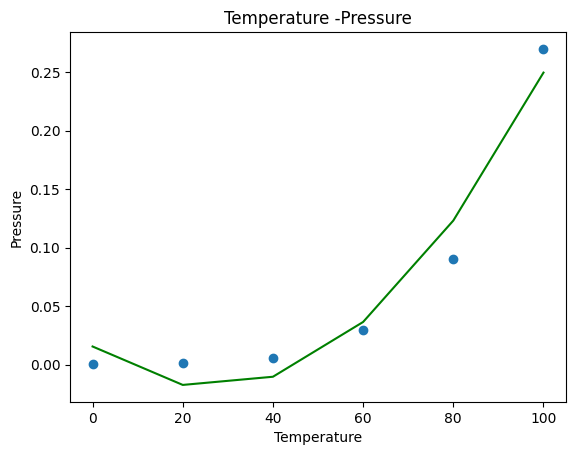

In [76]:
plt.scatter(x,y)
plt.plot(x,y_pred1,color='g')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Temperature -Pressure")

In [81]:
df1=pd.DataFrame({"Actual Value":y,"Predicted Value(SR)":y_pred,"Poly Predicted value":y_pred1})
df1

,Actual Value,Predicted Value(SR),Poly Predicted value
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975
